# Data acquisition

In [9]:
%matplotlib inline

from __future__ import division
import itertools, igraph, multiprocessing, time
import numpy_indexed as npix
import resiliences

reload(resiliences);

In [10]:
e = resiliences.experiment()

In [11]:
def calculate_vertex_counts(factor = 1, vertex_count_top_exponent = 1):
    counts = [factor * 100**n for n in range(1, vertex_count_top_exponent + 1)]
    
    return counts;

vertex_counts = calculate_vertex_counts()

In [12]:
def calculate_densities(repetition_count = 10):
    densities = [repetition_count * [e.calculate_density(n, density)] for n in vertex_counts for density in ["min", "avg", "max"]]
    flattened = [val for sublist in densities for val in sublist]
    densities = flattened
    return densities

densities = calculate_densities()

In [18]:
def get_results(vertex_counts, densities, graph_type="random"):

    results_random = [(e.probe(n, density=d, type=graph_type)) for n in vertex_counts for d in densities]
    results_random

    # Filter out graphs not complying to the vertex count requirement.
    results_filtered = filter(lambda x: x[1] > 3, results_random)
    results_filtered.sort()
    return results_filtered

results = get_results(vertex_counts, densities)

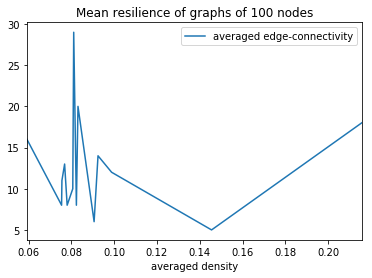

In [20]:
%matplotlib inline

def group_plot(results, n, name=""):

    results = results_filtered

    data = results

    x, y = [x[0] for x in data], [y[1] for y in data]

    [x_unique, y_mean] = npix.group_by(x).mean(y)

    data = zip(x, y)

    #print data

    e.plot_save(data, n, name);

group_plot(results, 100, "plot.svg");

In [21]:
results_geometric = [(e.probe(n, density = d, type="geometric")) for n in vertex_counts for d in densities]
results_geometric;

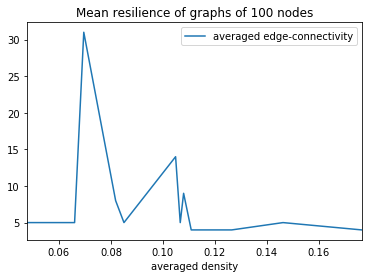

In [22]:
# Filter out anomalous graphs not complying to the vertex count requirement.
results_filtered = filter(lambda x: x[1] > 3, results_geometric)
results_filtered.sort()
results_filtered

group_plot(results_filtered, 100)

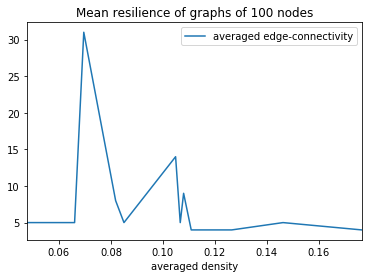

In [24]:
# Geometric approach

results = get_results(vertex_counts, densities, graph_type="geometric")

group_plot(results, 100, "geometric.svg");